In [2]:

import pandas as pd

# boston_dataset = load_boston()

In [3]:
df=pd.read_csv("1_boston_housing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

x = df.loc[:,df.columns!='MEDV']
y = df.loc[:,df.columns=='MEDV']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train =mms.fit_transform(x_train)
x_test =mms.transform(x_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()

2025-04-22 13:57:42.706378: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 13:57:42.706809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 13:57:42.709027: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 13:57:42.715417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745310462.726360   11225 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745310462.72

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.05,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 541.1674 - mae: 21.5891 - val_loss: 506.1113 - val_mae: 20.4494
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 522.9507 - mae: 20.9021 - val_loss: 444.4658 - val_mae: 18.7753
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 404.8068 - mae: 18.1292 - val_loss: 357.5874 - val_mae: 16.0606
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 352.9860 - mae: 16.0742 - val_loss: 250.2658 - val_mae: 11.7628
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.8549 - mae: 11.7300 - val_loss: 167.1561 - val_mae: 10.3221
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.1554 - mae: 9.8603 - val_loss: 148.9454 - val_mae: 10.4223
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123.6981 - mae: 8.4881 - val_loss: 135.5804 - val_mae: 9.8150
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.8143 - mae: 7.6319 - val_loss: 113.2391 - val_mae: 8.9506
Epoch 9/100
11/11 ━━━

In [17]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.7502 - mae: 2.5869
MSE :  10.437673568725586
MAE :  2.504948377609253


In [18]:
y1 = model.predict(x_test[:])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [19]:
y_test

,MEDV
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


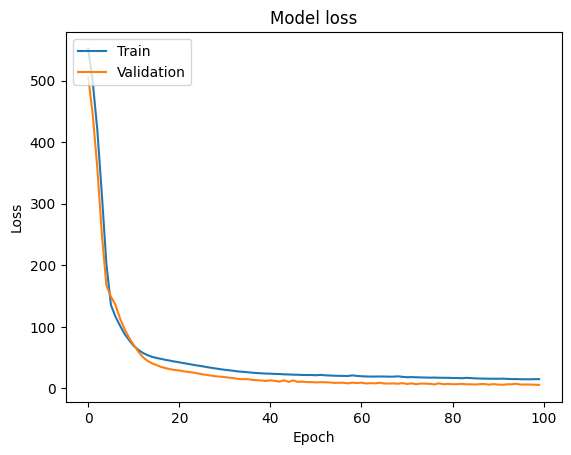

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
ps=[]
for i in y1:
    ps.append(list(i)[0])

In [23]:
d = pd.DataFrame({'actual':y_test['MEDV'],'predicted':ps})

In [24]:
d

,actual,predicted
307,28.2,29.910719
343,23.9,26.169184
47,16.6,18.042706
67,22.0,20.367596
362,20.8,21.686359
...,...,...
467,19.1,15.384971
95,28.4,26.791540
122,20.5,19.564497
260,33.8,34.380093
